# Échantillonnage par EKNN et comparaison avec d'autres méthodes

On compare les techniques d'échantillonnage suivantes :

- **EKNNS** : EKNN Sampling (dépendant du classificateur EKNN) ;
- **RD** : Random Sampling ;
- **UNC** : Uncertainty Sampling (probability-based).

In [33]:
import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification

from modAL.uncertainty import uncertainty_sampling

from experiment.eknn import EKNN
from experiment.lib import visualise, get_X_y, test
from experiment.max_am import ambiguity_measure, max_am

In [34]:
RANDOM_STATE  = 23

N_QUERIES     = 50
N_SPI         = 5    # Number of samples to label per iteration
TEST_SIZE     = 75  # Number of samples in test size

N_SAMPLES     = 200 # Size of the synthetic datasets

# Classifiers
classifiers = (
    ("RF",      RandomForestClassifier, "g", { "n_estimators": 100, }),
    ("LR",      LogisticRegression,     "k", { "max_iter": 1000, }),
    ("E5NN",    EKNN,                   "m", { "n_neighbors": 5, "multiprocesses": True, }),
)

# Sampling methods
sampling = (
    ("EkNNS", "eknn", "-"),
    ("RD",    None,   "-."),  # Random Sampling
)

## E1NNS vs RD

### Synthéthiques

#### Deux classes équilibrées

In [35]:
# Condition: N_CLASSES * N_CPC <= 2^N_INFORMATIVE
N_CLASSES     = 2
N_CPC         = 4    # Number of clusters per class
N_INFORMATIVE = 3

YLIMIT        = [.6, 1.]

Counter({1: 100, 0: 100})
  [ syn_50_50_e1nns_rd_RF done in 26.54 s ] (RF)
       RF-EkNNS : (0.8117170519725402, 0.8528162813607932)
       RF-RD    : (0.8025124057245729, 0.8524209276087606)
  [ syn_50_50_e1nns_rd_LR done in 4.73 s ] (LR)
       LR-EkNNS : (0.744348934589763, 0.7729843987435704)
       LR-RD    : (0.7399749808295525, 0.7730916858371141)
  [ syn_50_50_e1nns_rd_E5NN done in 16.9 s ] (E5NN)
       E5NN-EkNNS : (0.7171268939781603, 0.7415397726885065)
       E5NN-RD    : (0.7333507429471643, 0.7810492570528359)
syn_50_50_e1nns_rd achieved in 48.18 s


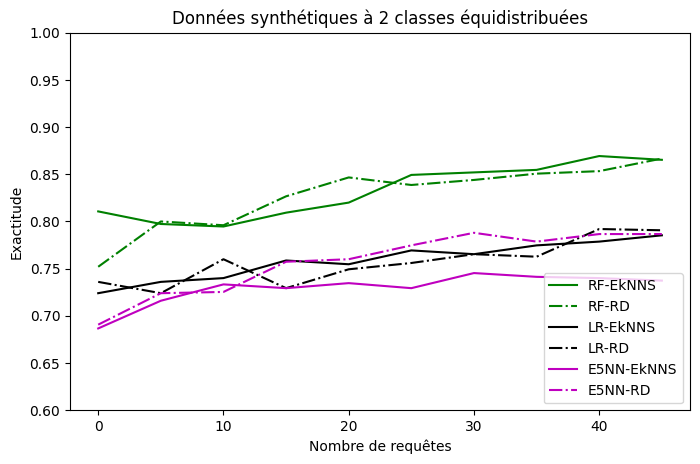

In [36]:
X, y = make_classification(
    n_samples            = N_SAMPLES,
    n_classes            = N_CLASSES,
    n_clusters_per_class = N_CPC,
    n_informative        = N_INFORMATIVE,
    weights              = (.5, .5),
    random_state         = RANDOM_STATE
)

results = test("syn", "syn_50_50_e1nns_rd", X, y, classifiers, N_QUERIES, N_SPI, sampling, test_size=TEST_SIZE/y.shape[0])
visualise("Données synthétiques à 2 classes équidistribuées", N_QUERIES, N_SPI, YLIMIT, **results)

del X, y, results

#### Deux classes non-équilibrées

Counter({0: 150, 1: 50})
  [ syn_75_25_e1nns_rd_RF done in 26.47 s ] (RF)
       RF-EkNNS : (0.7822264407537283, 0.8327068925796053)
       RF-RD    : (0.794846394227601, 0.8350202724390656)
  [ syn_75_25_e1nns_rd_LR done in 4.7 s ] (LR)
       LR-EkNNS : (0.755968525806349, 0.7981648075269846)
       LR-RD    : (0.7551572372935074, 0.7859094293731592)
  [ syn_75_25_e1nns_rd_E5NN done in 18.31 s ] (E5NN)
       E5NN-EkNNS : (0.7315297708978813, 0.7668702291021187)
       E5NN-RD    : (0.7427764433155841, 0.7657568900177489)
syn_75_25_e1nns_rd achieved in 49.49 s


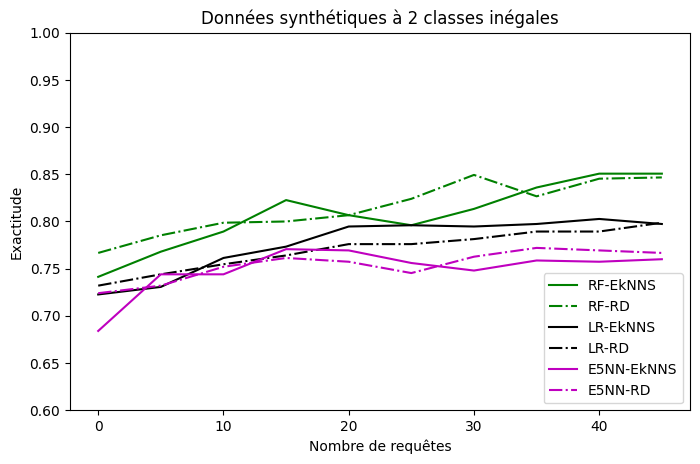

In [37]:
X, y = make_classification(
    n_samples            = N_SAMPLES,
    n_classes            = N_CLASSES,
    n_clusters_per_class = N_CPC,
    n_informative        = N_INFORMATIVE,
    weights              = (.75, .25),
    random_state         = RANDOM_STATE
)

results = test("syn", "syn_75_25_e1nns_rd", X, y, classifiers, N_QUERIES, N_SPI, sampling, test_size=TEST_SIZE/y.shape[0])
visualise("Données synthétiques à 2 classes inégales", N_QUERIES, N_SPI, YLIMIT, **results)

del X, y, results

#### Cinq classes équilibrées

In [38]:
# Condition: N_CLASSES * N_CPC <= 2^N_INFORMATIVE
N_CLASSES     = 5
N_CPC         = 4    # Number of clusters per class
N_INFORMATIVE = 5

YLIMIT        = [.2, .6]

Counter({1: 40, 2: 40, 0: 40, 3: 40, 4: 40})
  [ syn_20_20_20_20_20_e1nns_rd_RF done in 28.27 s ] (RF)
       RF-EkNNS : (0.3137343505295184, 0.3443989828038149)
       RF-RD    : (0.3171303928758098, 0.34633627379085685)
  [ syn_20_20_20_20_20_e1nns_rd_LR done in 6.99 s ] (LR)
       LR-EkNNS : (0.31924340679563434, 0.3343565932043656)
       LR-RD    : (0.3249599119134537, 0.34384008808654637)
  [ syn_20_20_20_20_20_e1nns_rd_E5NN done in 17.95 s ] (E5NN)
       E5NN-EkNNS : (0.32632025007561305, 0.3510130832577203)
       E5NN-RD    : (0.32310270722891204, 0.3318306261044213)
syn_20_20_20_20_20_e1nns_rd achieved in 53.21 s


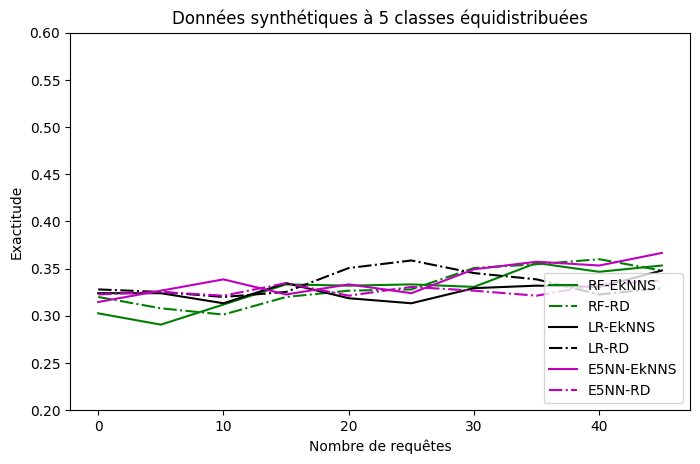

In [39]:
X, y = make_classification(
    n_samples            = N_SAMPLES,
    n_classes            = N_CLASSES,
    n_clusters_per_class = N_CPC,
    n_informative        = N_INFORMATIVE,
    weights              = (.2, .2, .2, .2, .2),
    random_state         = RANDOM_STATE
)

results = test("syn", "syn_20_20_20_20_20_e1nns_rd", X, y, classifiers, N_QUERIES, N_SPI, sampling, test_size=TEST_SIZE/y.shape[0])
visualise("Données synthétiques à 5 classes équidistribuées", N_QUERIES, N_SPI, YLIMIT, **results)

del X, y, results

#### Cinq classes non-équilibrées

Counter({0: 100, 1: 40, 2: 20, 3: 20, 4: 20})
  [ syn_50_20_10_10_10_e1nns_rd_RF done in 28.16 s ] (RF)
       RF-EkNNS : (0.43231710492719927, 0.5228828950728006)
       RF-RD    : (0.45530009225082146, 0.5244332410825118)
  [ syn_50_20_10_10_10_e1nns_rd_LR done in 7.06 s ] (LR)
       LR-EkNNS : (0.3459437597298175, 0.39645624027018267)
       LR-RD    : (0.3580705272313312, 0.4107294727686687)
  [ syn_50_20_10_10_10_e1nns_rd_E5NN done in 19.42 s ] (E5NN)
       E5NN-EkNNS : (0.42997870585592113, 0.49562129414407874)
       E5NN-RD    : (0.42467607787821016, 0.49399058878845636)
syn_50_20_10_10_10_e1nns_rd achieved in 54.65 s


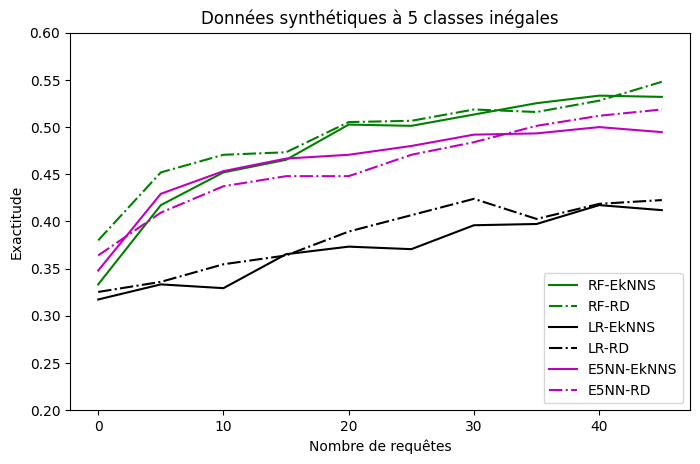

In [40]:
X, y = make_classification(
    n_samples            = N_SAMPLES,
    n_classes            = N_CLASSES,
    n_clusters_per_class = N_CPC,
    n_informative        = N_INFORMATIVE,
    weights              = (.5, .20, .10, .10, .10),
    random_state         = RANDOM_STATE
)

results = test("syn", "syn_50_20_10_10_10_e1nns_rd", X, y, classifiers, N_QUERIES, N_SPI, sampling, test_size=TEST_SIZE/y.shape[0])
visualise("Données synthétiques à 5 classes inégales", N_QUERIES, N_SPI, YLIMIT, **results)

del X, y, results

### Réelles

In [41]:
YLIMIT        = [.5, 1.]

#### Skin Segmentation

Counter({1: 7920, 0: 2080})
  [ real_skin_e1nns_rd_RF done in 116.42 s ] (RF)
       RF-EkNNS : (0.8907984141781031, 0.9369349191552303)
       RF-RD    : (0.90163508693178, 0.934098246401553)
  [ real_skin_e1nns_rd_LR done in 104.31 s ] (LR)
       LR-EkNNS : (0.8997201270763486, 0.917346539590318)
       LR-RD    : (0.9096034786173149, 0.919196521382685)
  [ real_skin_e1nns_rd_E5NN done in 109.52 s ] (E5NN)
       E5NN-EkNNS : (0.9426642430883316, 0.9560024235783349)
       E5NN-RD    : (0.9362925435568347, 0.9538407897764988)
real_skin_e1nns_rd achieved in 330.25 s


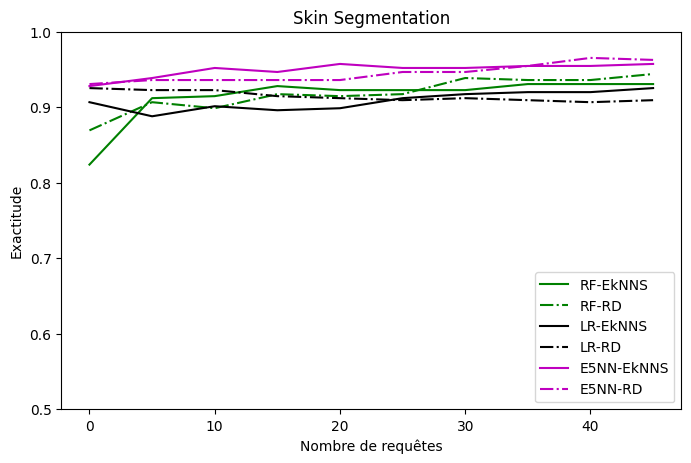

In [42]:
# 10,000 random indices
rng = np.random.default_rng(RANDOM_STATE)
X, y = get_X_y("data/skin_segmentation.csv")

values = set()
while len(values) < 10000:
    index = rng.integers(X.shape[0])
    values.add(index)
values = np.array(list(values))

# Restricted dataset
X, y = X[values], y[values]

results = test("real", "real_skin_e1nns_rd", X, y, classifiers, N_QUERIES, N_SPI, sampling, test_size=TEST_SIZE/y.shape[0])
visualise("Skin Segmentation", N_QUERIES, N_SPI, YLIMIT, **results)

del X, y, results, values

#### QSAR Oral Toxicity

Counter({0: 8251, 1: 741})
  [ real_qsar_e1nns_rd_RF done in 151.01 s ] (RF)
       RF-EkNNS : (0.819356908068337, 0.9587764252649963)
       RF-RD    : (0.9109450220647255, 0.9279883112686078)
  [ real_qsar_e1nns_rd_LR done in 145.07 s ] (LR)
       LR-EkNNS : (0.8494379820634079, 0.9494953512699256)
       LR-RD    : (0.9096736840795321, 0.9239263159204678)
  [ real_qsar_e1nns_rd_E5NN done in 161.72 s ] (E5NN)
       E5NN-EkNNS : (0.8693084863002373, 0.922691513699763)
       E5NN-RD    : (0.9063841234422672, 0.9176158765577327)
real_qsar_e1nns_rd achieved in 457.8 s


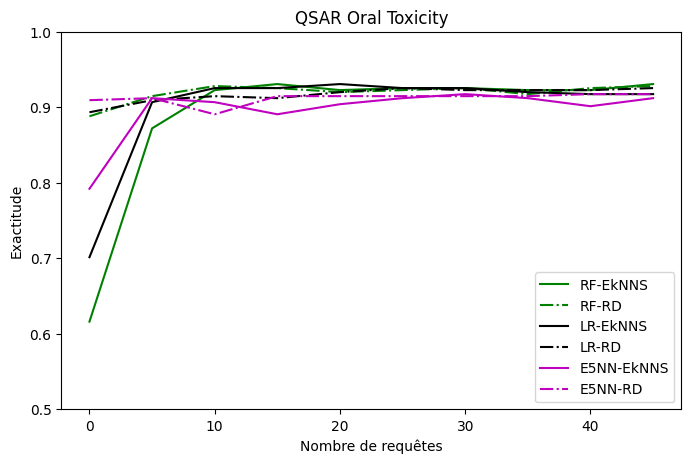

In [43]:
X, y = get_X_y("data/qsar_oral_toxicity.csv")

results = test("real", "real_qsar_e1nns_rd", X, y, classifiers, N_QUERIES, N_SPI, sampling, test_size=TEST_SIZE/y.shape[0])
visualise("QSAR Oral Toxicity", N_QUERIES, N_SPI, YLIMIT, **results)

del X, y, results

#### Letter Recognition

##### E - F

Counter({1: 775, 0: 768})
  [ real_letterEF_e1nns_rd_RF done in 37.04 s ] (RF)
       RF-EkNNS : (0.9416619999593259, 0.9724713333740076)
       RF-RD    : (0.9358255353778236, 0.9639077979555096)
  [ real_letterEF_e1nns_rd_LR done in 27.62 s ] (LR)
       LR-EkNNS : (0.9339393688650108, 0.9524606311349892)
       LR-RD    : (0.9323617686594429, 0.9535048980072239)
  [ real_letterEF_e1nns_rd_E5NN done in 32.1 s ] (E5NN)
       E5NN-EkNNS : (0.87762913925101, 0.9175708607489901)
       E5NN-RD    : (0.876828799337835, 0.9013045339954984)
real_letterEF_e1nns_rd achieved in 96.77 s


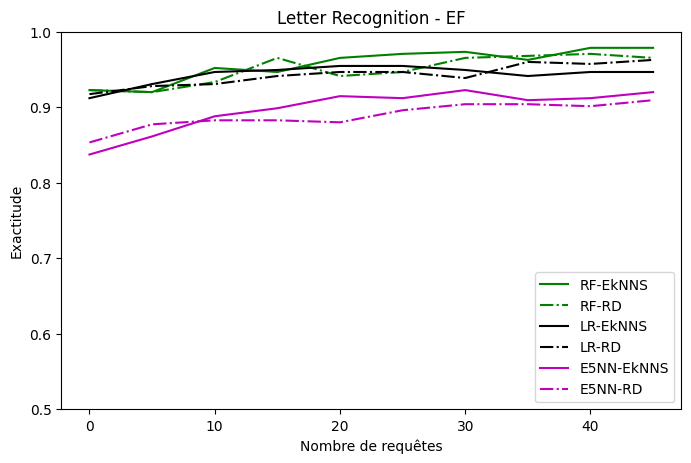

In [44]:
X, y = get_X_y("data/letter_ef.csv", target_position=0)

results = test("real", "real_letterEF_e1nns_rd", X, y, classifiers, N_QUERIES, N_SPI, sampling, test_size=TEST_SIZE/y.shape[0])
visualise("Letter Recognition - EF", N_QUERIES, N_SPI, YLIMIT, **results)

del X, y, results

##### D - P

Counter({0: 805, 1: 803})
  [ real_letterDP_e1nns_rd_RF done in 38.36 s ] (RF)
       RF-EkNNS : (0.9459914928704759, 0.9558751737961909)
       RF-RD    : (0.9533915906056265, 0.9671417427277067)
  [ real_letterDP_e1nns_rd_LR done in 28.6 s ] (LR)
       LR-EkNNS : (0.9406397448546255, 0.9660269218120412)
       LR-RD    : (0.9473094840043141, 0.9764238493290194)
  [ real_letterDP_e1nns_rd_E5NN done in 33.44 s ] (E5NN)
       E5NN-EkNNS : (0.8704773931460862, 0.9113892735205803)
       E5NN-RD    : (0.8567055295937409, 0.9235611370729258)
real_letterDP_e1nns_rd achieved in 100.4 s


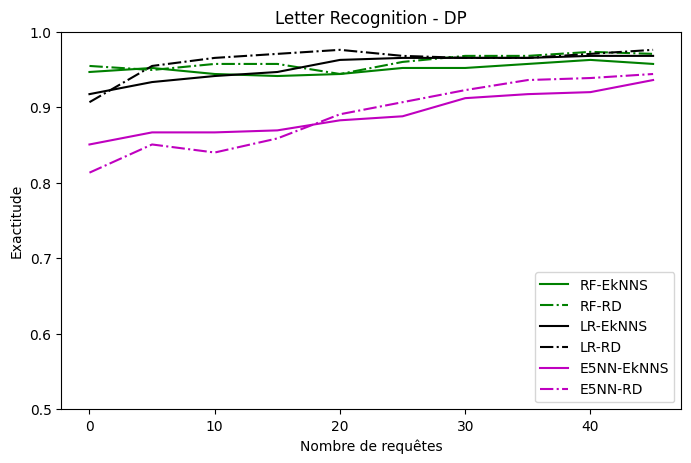

In [45]:
X, y = get_X_y("data/letter_dp.csv", target_position=0)

results = test("real", "real_letterDP_e1nns_rd", X, y, classifiers, N_QUERIES, N_SPI, sampling, test_size=TEST_SIZE/y.shape[0])
visualise("Letter Recognition - DP", N_QUERIES, N_SPI, YLIMIT, **results)

del X, y, results

##### I - J

Counter({0: 755, 1: 747})
  [ real_letterIJ_e1nns_rd_RF done in 36.23 s ] (RF)
       RF-EkNNS : (0.8369508157391056, 0.8921158509275612)
       RF-RD    : (0.8788185949018308, 0.9163814050981693)
  [ real_letterIJ_e1nns_rd_LR done in 25.6 s ] (LR)
       LR-EkNNS : (0.8497224409998135, 0.8900108923335196)
       LR-RD    : (0.8704327920020604, 0.8879672079979396)
  [ real_letterIJ_e1nns_rd_E5NN done in 32.3 s ] (E5NN)
       E5NN-EkNNS : (0.8545736271825374, 0.9150263728174625)
       E5NN-RD    : (0.8504695283425545, 0.9025971383241123)
real_letterIJ_e1nns_rd achieved in 94.13 s


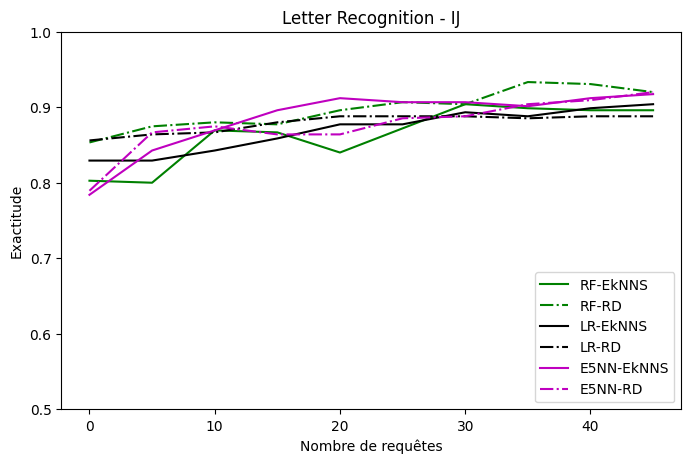

In [46]:
X, y = get_X_y("data/letter_ij.csv", target_position=0)

results = test("real", "real_letterIJ_e1nns_rd", X, y, classifiers, N_QUERIES, N_SPI, sampling, test_size=TEST_SIZE/y.shape[0])
visualise("Letter Recognition - IJ", N_QUERIES, N_SPI, YLIMIT, **results)

del X, y, results

##### V - Y

Counter({1: 786, 0: 764})
  [ real_letterVY_e1nns_rd_RF done in 37.58 s ] (RF)
       RF-EkNNS : (0.8440765078207382, 0.922323492179262)
       RF-RD    : (0.8307301251227358, 0.9047365415439309)
  [ real_letterVY_e1nns_rd_LR done in 26.53 s ] (LR)
       LR-EkNNS : (0.7879932047617813, 0.9042734619048851)
       LR-RD    : (0.808489473052158, 0.8944438602811754)
  [ real_letterVY_e1nns_rd_E5NN done in 32.21 s ] (E5NN)
       E5NN-EkNNS : (0.7221804606534953, 0.830352872679838)
       E5NN-RD    : (0.7598218205780796, 0.8599115127552541)
real_letterVY_e1nns_rd achieved in 96.32 s


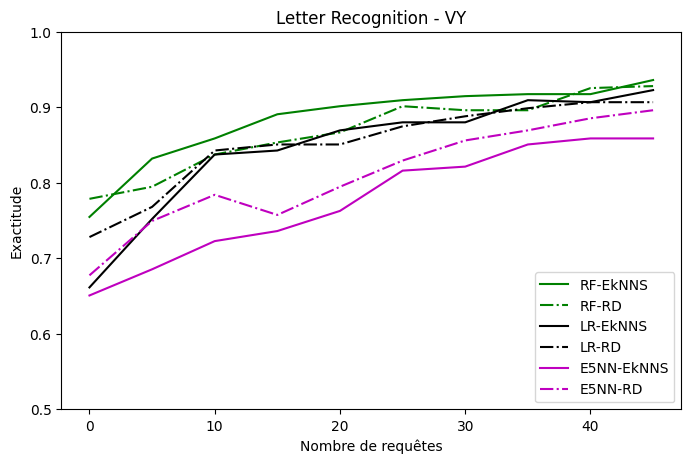

In [47]:
X, y = get_X_y("data/letter_vy.csv", target_position=0)

results = test("real", "real_letterVY_e1nns_rd", X, y, classifiers, N_QUERIES, N_SPI, sampling, test_size=TEST_SIZE/y.shape[0])
visualise("Letter Recognition - VY", N_QUERIES, N_SPI, YLIMIT, **results)

del X, y, results

#### Pen-based Recognition of Handwritten Digits

##### 7 vs 9

Counter({0: 1142, 1: 1055})
  [ real_digits_7vs9_e1nns_rd_RF done in 49.95 s ] (RF)
       RF-EkNNS : (0.9541624763490006, 0.9727708569843325)
       RF-RD    : (0.9600031107998255, 0.9743968892001742)
  [ real_digits_7vs9_e1nns_rd_LR done in 38.24 s ] (LR)
       LR-EkNNS : (0.961518277842678, 0.9872817221573219)
       LR-RD    : (0.9712383684296794, 0.9908949649036541)
  [ real_digits_7vs9_e1nns_rd_E5NN done in 43.58 s ] (E5NN)
       E5NN-EkNNS : (0.9342072753731752, 0.961792724626825)
       E5NN-RD    : (0.9601321690738985, 0.9737344975927683)
real_digits_7vs9_e1nns_rd achieved in 131.77 s


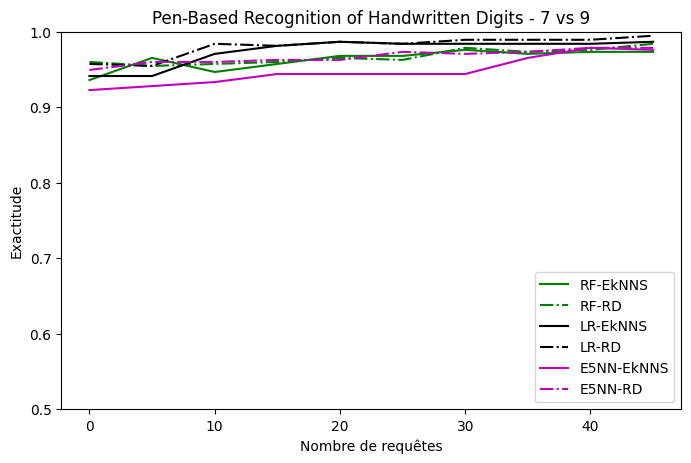

In [48]:
X, y = get_X_y("data/digits_7vs9.csv")

results = test("real", "real_digits_7vs9_e1nns_rd", X, y, classifiers, N_QUERIES, N_SPI, sampling, test_size=TEST_SIZE/y.shape[0])
visualise("Pen-Based Recognition of Handwritten Digits - 7 vs 9", N_QUERIES, N_SPI, YLIMIT, **results)

del X, y, results

##### 1 vs 7

Counter({0: 1143, 1: 1142})
  [ real_digits_1vs7_e1nns_rd_RF done in 52.4 s ] (RF)
       RF-EkNNS : (0.9382355431183165, 0.9620311235483505)
       RF-RD    : (0.933404922865432, 0.9668617438012346)
  [ real_digits_1vs7_e1nns_rd_LR done in 39.71 s ] (LR)
       LR-EkNNS : (0.9608205422237933, 0.98531279110954)
       LR-RD    : (0.9506337362066443, 0.9768329304600226)
  [ real_digits_1vs7_e1nns_rd_E5NN done in 46.65 s ] (E5NN)
       E5NN-EkNNS : (0.9325711387622554, 0.954362194571078)
       E5NN-RD    : (0.9391932034181015, 0.9674734632485654)
real_digits_1vs7_e1nns_rd achieved in 138.77 s


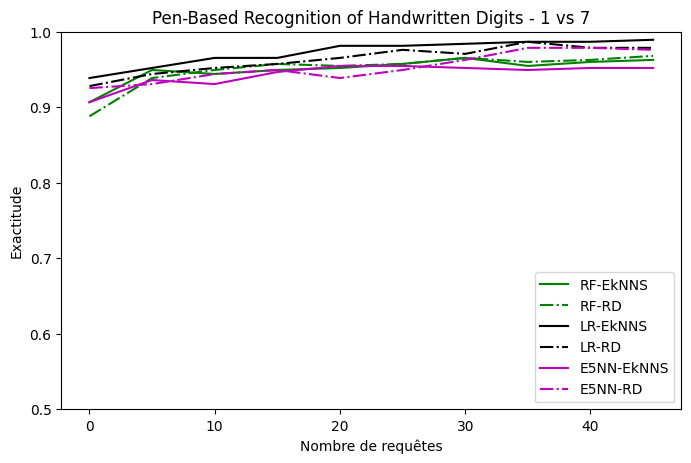

In [49]:
X, y = get_X_y("data/digits_1vs7.csv")

results = test("real", "real_digits_1vs7_e1nns_rd", X, y, classifiers, N_QUERIES, N_SPI, sampling, test_size=TEST_SIZE/y.shape[0])
visualise("Pen-Based Recognition of Handwritten Digits - 1 vs 7", N_QUERIES, N_SPI, YLIMIT, **results)

del X, y, results

##### 3 vs 6 vs 8

Counter({1: 1056, 2: 1055, 0: 1055})
  [ real_digits_3vs6vs8_e1nns_rd_RF done in 70.79 s ] (RF)
       RF-EkNNS : (0.9701851730346567, 0.9866148269653432)
       RF-RD    : (0.9572674773521223, 0.9781991893145444)
  [ real_digits_3vs6vs8_e1nns_rd_LR done in 61.33 s ] (LR)
       LR-EkNNS : (0.9894494963215997, 0.994017170345067)
       LR-RD    : (0.9857967580899357, 0.9870032419100642)
  [ real_digits_3vs6vs8_e1nns_rd_E5NN done in 65.1 s ] (E5NN)
       E5NN-EkNNS : (0.976957662716706, 0.9867756706166273)
       E5NN-RD    : (0.9707236076031404, 0.9743430590635259)
real_digits_3vs6vs8_e1nns_rd achieved in 197.23 s


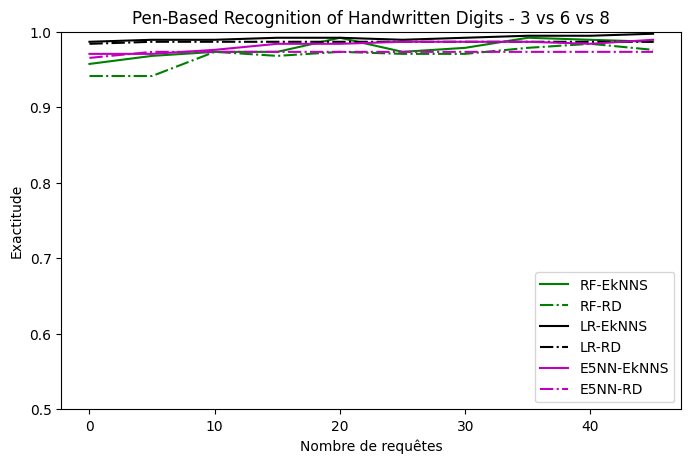

In [50]:
X, y = get_X_y("data/digits_3vs6vs8.csv")

results = test("real", "real_digits_3vs6vs8_e1nns_rd", X, y, classifiers, N_QUERIES, N_SPI, sampling, test_size=TEST_SIZE/y.shape[0])
visualise("Pen-Based Recognition of Handwritten Digits - 3 vs 6 vs 8", N_QUERIES, N_SPI, YLIMIT, **results)

del X, y, results

#### Wine Quality

In [51]:
YLIMIT        = [.0, 6.]

##### Red Wine Quality

Counter({2: 681, 3: 638, 4: 199, 1: 53, 5: 18, 0: 10})
  [ real_red_wine_e1nns_rd_RF done in 66.82 s ] (RF)
       RF-EkNNS : (0.37498198792928317, 0.45595134540405013)
       RF-RD    : (0.43480723076804084, 0.5209261025652926)
  [ real_red_wine_e1nns_rd_LR done in 54.64 s ] (LR)
       LR-EkNNS : (0.3493577761368558, 0.44157555719647756)
       LR-RD    : (0.3996529534899108, 0.4968803798434226)
  [ real_red_wine_e1nns_rd_E5NN done in 60.23 s ] (E5NN)
       E5NN-EkNNS : (0.40528198849594704, 0.4816513448373863)
       E5NN-RD    : (0.4311146092604528, 0.5022187240728805)
real_red_wine_e1nns_rd achieved in 181.7 s


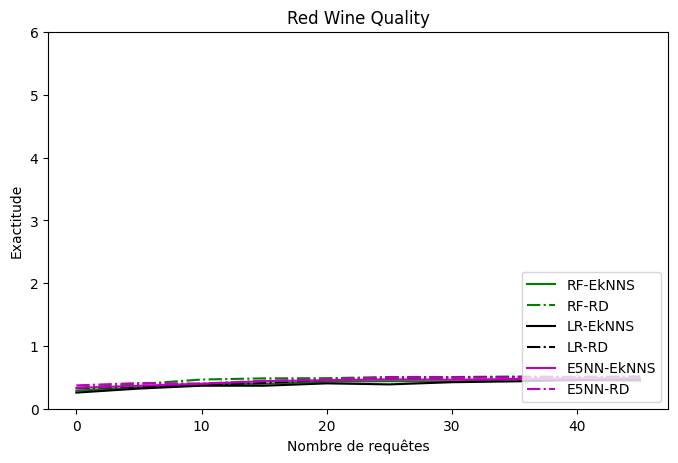

In [52]:
X, y = get_X_y("data/red_wine_quality.csv")

results = test("real", "real_red_wine_e1nns_rd", X, y, classifiers, N_QUERIES, N_SPI, sampling, test_size=TEST_SIZE/y.shape[0])
visualise("Red Wine Quality", N_QUERIES, N_SPI, YLIMIT, **results)

del X, y, results

##### White Wine Quality

Counter({3: 2198, 2: 1457, 4: 880, 5: 175, 1: 163, 0: 20, 6: 5})
  [ real_white_wine_e1nns_rd_RF done in 302.1 s ] (RF)
       RF-EkNNS : (0.3337735466734205, 0.38889311999324616)
       RF-RD    : (0.34814492502850997, 0.42785507497149006)
  [ real_white_wine_e1nns_rd_LR done in 292.42 s ] (LR)
       LR-EkNNS : (0.3410998332066305, 0.41250016679336954)
       LR-RD    : (0.3579596898686305, 0.4095069767980362)
  [ real_white_wine_e1nns_rd_E5NN done in 297.07 s ] (E5NN)
       E5NN-EkNNS : (0.3575268279527991, 0.3944731720472009)
       E5NN-RD    : (0.3482829470079005, 0.4037170529920995)
real_white_wine_e1nns_rd achieved in 891.59 s


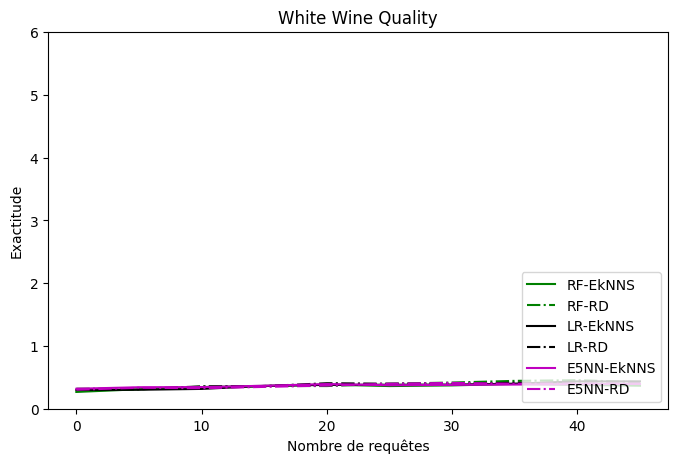

In [53]:
X, y = get_X_y("data/white_wine_quality.csv")

results = test("real", "real_white_wine_e1nns_rd", X, y, classifiers, N_QUERIES, N_SPI, sampling, test_size=TEST_SIZE/X.shape[0])
visualise("White Wine Quality", N_QUERIES, N_SPI, YLIMIT, **results)

del X, y, results

## E3NNS vs RD

### Synthéthiques

#### Deux classes équilibrées

In [54]:
# Condition: N_CLASSES * N_CPC <= 2^N_INFORMATIVE
N_CLASSES     = 2
N_CPC         = 4    # Number of clusters per class
N_INFORMATIVE = 3

YLIMIT        = [.6, 1.]

Counter({1: 100, 0: 100})
  [ syn_50_50_e3nns_rd_RF done in 26.53 s ] (RF)
       RF-EkNNS : (0.7663041352972103, 0.8158291980361231)
       RF-RD    : (0.7499958435942425, 0.8004041564057575)
  [ syn_50_50_e3nns_rd_LR done in 4.78 s ] (LR)
       LR-EkNNS : (0.7501770140625867, 0.7727563192707465)
       LR-RD    : (0.7397399253500293, 0.7669267413166373)
  [ syn_50_50_e3nns_rd_E5NN done in 18.16 s ] (E5NN)
       E5NN-EkNNS : (0.7148495391158566, 0.7467504608841437)
       E5NN-RD    : (0.7176042501597164, 0.7442624165069502)
syn_50_50_e3nns_rd achieved in 49.48 s


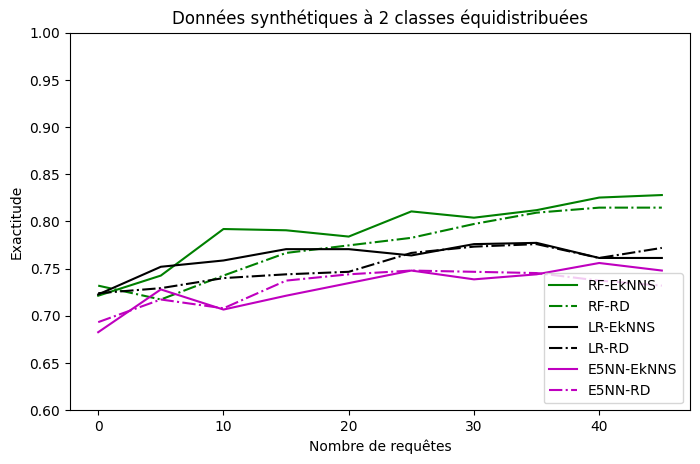

In [55]:
X, y = make_classification(
    n_samples            = N_SAMPLES,
    n_classes            = N_CLASSES,
    n_clusters_per_class = N_CPC,
    n_informative        = N_INFORMATIVE,
    weights              = (.5, .5),
    random_state         = RANDOM_STATE
)

results = test("syn", "syn_50_50_e3nns_rd", X, y, classifiers, N_QUERIES, N_SPI, sampling, test_size=TEST_SIZE/y.shape[0])
visualise("Données synthétiques à 2 classes équidistribuées", N_QUERIES, N_SPI, YLIMIT, **results)

del X, y, results

#### Deux classes non-équilibrées

Counter({0: 150, 1: 50})
  [ syn_75_25_e3nns_rd_RF done in 26.79 s ] (RF)
       RF-EkNNS : (0.7669318908616382, 0.8306681091383618)
       RF-RD    : (0.7951012168411746, 0.8451654498254921)
  [ syn_75_25_e3nns_rd_LR done in 4.73 s ] (LR)
       LR-EkNNS : (0.758453451445604, 0.7868798818877292)
       LR-RD    : (0.7656562228007698, 0.7882104438658967)
  [ syn_75_25_e3nns_rd_E5NN done in 16.94 s ] (E5NN)
       E5NN-EkNNS : (0.7455981104386853, 0.7869352228946482)
       E5NN-RD    : (0.7597664999536705, 0.7701001667129962)
syn_75_25_e3nns_rd achieved in 48.46 s


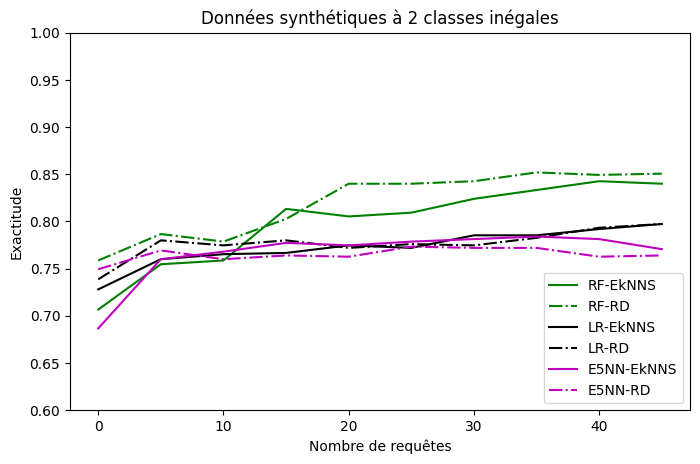

In [56]:
X, y = make_classification(
    n_samples            = N_SAMPLES,
    n_classes            = N_CLASSES,
    n_clusters_per_class = N_CPC,
    n_informative        = N_INFORMATIVE,
    weights              = (.75, .25),
    random_state         = RANDOM_STATE
)

results = test("syn", "syn_75_25_e3nns_rd", X, y, classifiers, N_QUERIES, N_SPI, sampling, test_size=TEST_SIZE/y.shape[0])
visualise("Données synthétiques à 2 classes inégales", N_QUERIES, N_SPI, YLIMIT, **results)

del X, y, results

#### Cinq classes équilibrées

In [57]:
# Condition: N_CLASSES * N_CPC <= 2^N_INFORMATIVE
N_CLASSES     = 5
N_CPC         = 4    # Number of clusters per class
N_INFORMATIVE = 5

YLIMIT        = [.2, .6]

Counter({1: 40, 2: 40, 0: 40, 3: 40, 4: 40})
  [ syn_20_20_20_20_20_e3nns_rd_RF done in 28.41 s ] (RF)
       RF-EkNNS : (0.30968242993244344, 0.3521842367342233)
       RF-RD    : (0.3275091676283472, 0.3572908323716529)
  [ syn_20_20_20_20_20_e3nns_rd_LR done in 6.94 s ] (LR)
       LR-EkNNS : (0.28211467680488994, 0.3096186565284434)
       LR-RD    : (0.2891614709935755, 0.31590519567309117)
  [ syn_20_20_20_20_20_e3nns_rd_E5NN done in 17.85 s ] (E5NN)
       E5NN-EkNNS : (0.3300652060632477, 0.3488681272700856)
       E5NN-RD    : (0.31791324117031144, 0.34768675882968864)
syn_20_20_20_20_20_e3nns_rd achieved in 53.21 s


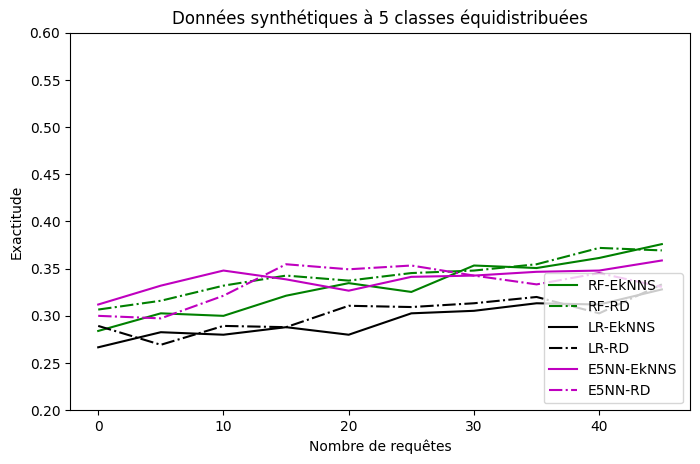

In [58]:
X, y = make_classification(
    n_samples            = N_SAMPLES,
    n_classes            = N_CLASSES,
    n_clusters_per_class = N_CPC,
    n_informative        = N_INFORMATIVE,
    weights              = (.2, .2, .2, .2, .2),
    random_state         = RANDOM_STATE
)

results = test("syn", "syn_20_20_20_20_20_e3nns_rd", X, y, classifiers, N_QUERIES, N_SPI, sampling, test_size=TEST_SIZE/y.shape[0])
visualise("Données synthétiques à 5 classes équidistribuées", N_QUERIES, N_SPI, YLIMIT, **results)

del X, y, results

#### Cinq classes non-équilibrées

Counter({0: 100, 1: 40, 2: 20, 3: 20, 4: 20})
  [ syn_50_20_10_10_10_e1nns_rd_RF done in 29.59 s ] (RF)
       RF-EkNNS : (0.43501807940407233, 0.5084485872625943)
       RF-RD    : (0.4425554540321984, 0.5025112126344683)
  [ syn_50_20_10_10_10_e1nns_rd_LR done in 7.33 s ] (LR)
       LR-EkNNS : (0.3763036505928731, 0.424496349407127)
       LR-RD    : (0.3783370287774942, 0.4365963045558391)
  [ syn_50_20_10_10_10_e1nns_rd_E5NN done in 17.93 s ] (E5NN)
       E5NN-EkNNS : (0.43556321361328015, 0.5073701197200531)
       E5NN-RD    : (0.4274344407233088, 0.4853655592766913)
syn_50_20_10_10_10_e1nns_rd achieved in 54.86 s


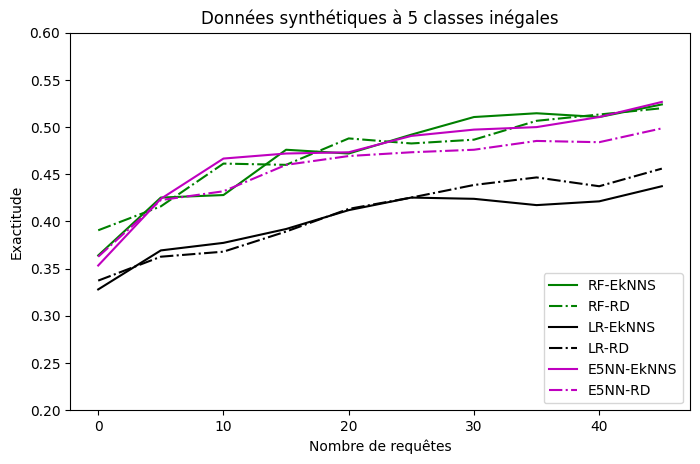

In [59]:
X, y = make_classification(
    n_samples            = N_SAMPLES,
    n_classes            = N_CLASSES,
    n_clusters_per_class = N_CPC,
    n_informative        = N_INFORMATIVE,
    weights              = (.5, .20, .10, .10, .10),
    random_state         = RANDOM_STATE
)

results = test("syn", "syn_50_20_10_10_10_e1nns_rd", X, y, classifiers, N_QUERIES, N_SPI, sampling, test_size=TEST_SIZE/y.shape[0])
visualise("Données synthétiques à 5 classes inégales", N_QUERIES, N_SPI, YLIMIT, **results)

del X, y, results

### Réelles

In [60]:
YLIMIT        = [.6, 1.]

#### Skin Segmentation

Counter({1: 7920, 0: 2080})
  [ real_skin_e1nns_rd_RF done in 116.34 s ] (RF)
       RF-EkNNS : (0.9168161350851955, 0.9477171982481378)
       RF-RD    : (0.9152796633584641, 0.942320336641536)
  [ real_skin_e1nns_rd_LR done in 105.6 s ] (LR)
       LR-EkNNS : (0.9043445161491099, 0.9388554838508902)
       LR-RD    : (0.8890157066378044, 0.9072509600288623)
  [ real_skin_e1nns_rd_E5NN done in 107.91 s ] (E5NN)
       E5NN-EkNNS : (0.9455014046853495, 0.9728985953146506)
       E5NN-RD    : (0.9527661515105869, 0.9693671818227466)
real_skin_e1nns_rd achieved in 329.85 s


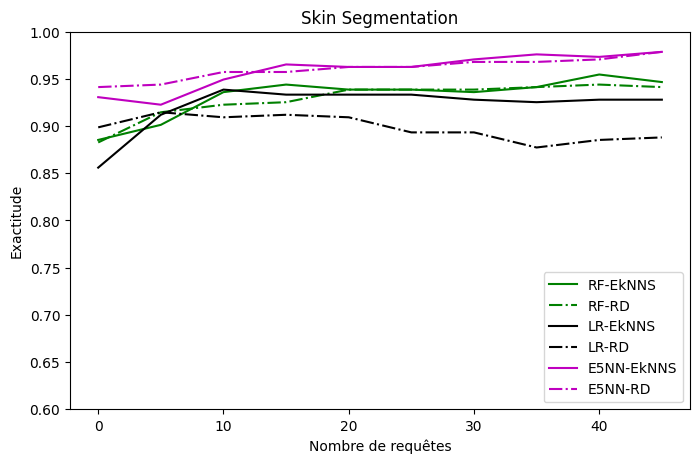

In [61]:
# 10,000 random indices
rng = np.random.default_rng(RANDOM_STATE)
X, y = get_X_y("data/skin_segmentation.csv")

values = set()
while len(values) < 10000:
    index = rng.integers(X.shape[0])
    values.add(index)
values = np.array(list(values))

# Restricted dataset
X, y = X[values], y[values]

results = test("real", "real_skin_e1nns_rd", X, y, classifiers, N_QUERIES, N_SPI, sampling, test_size=TEST_SIZE/y.shape[0])
visualise("Skin Segmentation", N_QUERIES, N_SPI, YLIMIT, **results)

del X, y, results, values

#### QSAR Oral Toxicity

Counter({0: 8251, 1: 741})
  [ real_qsar_e1nns_rd_RF done in 149.82 s ] (RF)
       RF-EkNNS : (0.7848262327183486, 0.9682404339483179)
       RF-RD    : (0.9057210392358357, 0.9220122940974975)
  [ real_qsar_e1nns_rd_LR done in 148.95 s ] (LR)
       LR-EkNNS : (0.8085731949652788, 0.9631601383680544)
       LR-RD    : (0.9029926028084712, 0.9199407305248621)
  [ real_qsar_e1nns_rd_E5NN done in 167.06 s ] (E5NN)
       E5NN-EkNNS : (0.8097005465920354, 0.9326994534079646)
       E5NN-RD    : (0.8979476698858898, 0.9169856634474433)
real_qsar_e1nns_rd achieved in 465.83 s


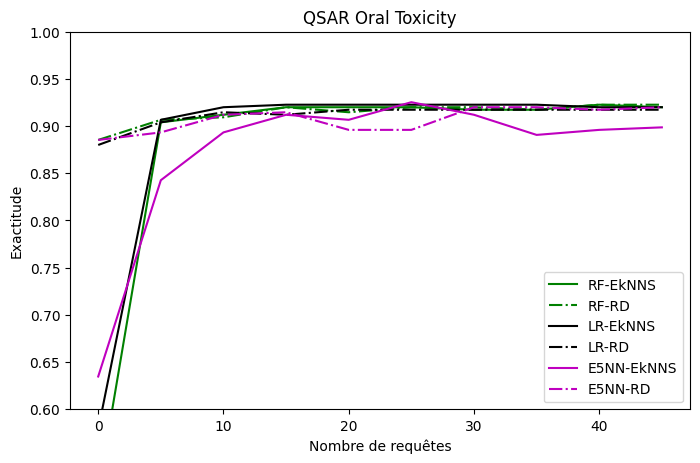

In [62]:
X, y = get_X_y("data/qsar_oral_toxicity.csv")

results = test("real", "real_qsar_e1nns_rd", X, y, classifiers, N_QUERIES, N_SPI, sampling, test_size=TEST_SIZE/y.shape[0])
visualise("QSAR Oral Toxicity", N_QUERIES, N_SPI, YLIMIT, **results)

del X, y, results

Counter({0: 8251, 1: 741})
  [ real_qsar_e1nns_rd_RF done in 151.34 s ] (RF)
       RF-EkNNS : (0.8179082912955917, 0.9463583753710749)
       RF-RD    : (0.8891196852305849, 0.9311469814360815)
  [ real_qsar_e1nns_rd_LR done in 145.15 s ] (LR)
       LR-EkNNS : (0.823134701032447, 0.9475319656342196)
       LR-RD    : (0.889899967168985, 0.9191666994976818)
  [ real_qsar_e1nns_rd_E5NN done in 163.75 s ] (E5NN)
       E5NN-EkNNS : (0.7706479862706085, 0.9440186803960583)
       E5NN-RD    : (0.9144526183897215, 0.9196807149436119)
real_qsar_e1nns_rd achieved in 460.24 s


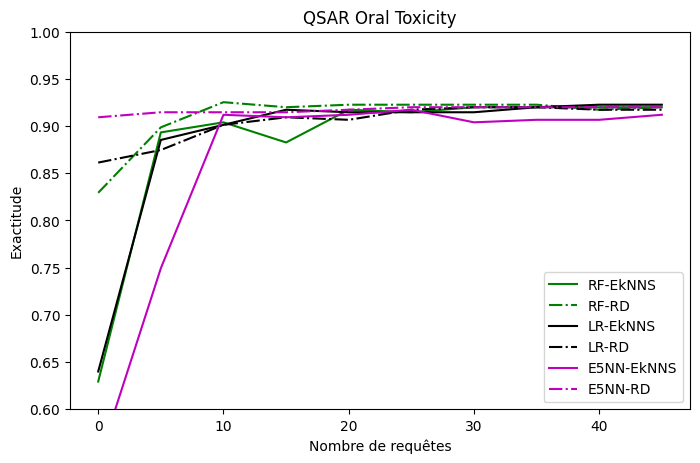

In [63]:
X, y = get_X_y("data/qsar_oral_toxicity.csv")

results = test("real", "real_qsar_e1nns_rd", X, y, classifiers, N_QUERIES, N_SPI, sampling, test_size=TEST_SIZE/y.shape[0])
visualise("QSAR Oral Toxicity", N_QUERIES, N_SPI, YLIMIT, **results)

del X, y, results

#### Letter Recognition

##### E - F

Counter({1: 775, 0: 768})
  [ real_letterEF_e1nns_rd_RF done in 36.94 s ] (RF)
       RF-EkNNS : (0.9578320862926479, 0.9707012470406855)
       RF-RD    : (0.9199911465029882, 0.951475520163678)
  [ real_letterEF_e1nns_rd_LR done in 27.8 s ] (LR)
       LR-EkNNS : (0.9200850047856811, 0.9481816618809854)
       LR-RD    : (0.9335638362977422, 0.9555028303689242)
  [ real_letterEF_e1nns_rd_E5NN done in 32.12 s ] (E5NN)
       E5NN-EkNNS : (0.880422659231645, 0.9030440074350218)
       E5NN-RD    : (0.9024795946946135, 0.9220537386387201)
real_letterEF_e1nns_rd achieved in 96.86 s


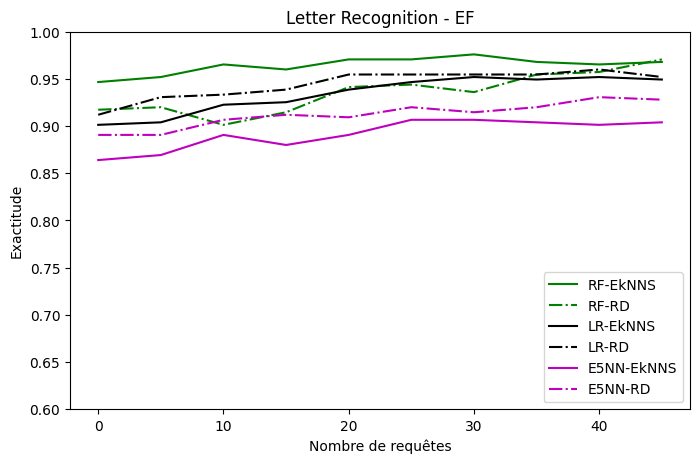

In [64]:
X, y = get_X_y("data/letter_ef.csv", target_position=0)

results = test("real", "real_letterEF_e1nns_rd", X, y, classifiers, N_QUERIES, N_SPI, sampling, test_size=TEST_SIZE/y.shape[0])
visualise("Letter Recognition - EF", N_QUERIES, N_SPI, YLIMIT, **results)

del X, y, results

##### D - P

Counter({0: 805, 1: 803})
  [ real_letterDP_e1nns_rd_RF done in 38.45 s ] (RF)
       RF-EkNNS : (0.9345017036099924, 0.9588316297233407)
       RF-RD    : (0.9483830321997034, 0.9625503011336302)
  [ real_letterDP_e1nns_rd_LR done in 27.65 s ] (LR)
       LR-EkNNS : (0.9609633415429756, 0.9771699917903575)
       LR-RD    : (0.9425895138115492, 0.976877152855117)
  [ real_letterDP_e1nns_rd_E5NN done in 35.23 s ] (E5NN)
       E5NN-EkNNS : (0.899005001901953, 0.9649949980980471)
       E5NN-RD    : (0.9324918543291345, 0.9560414790041982)
real_letterDP_e1nns_rd achieved in 101.34 s


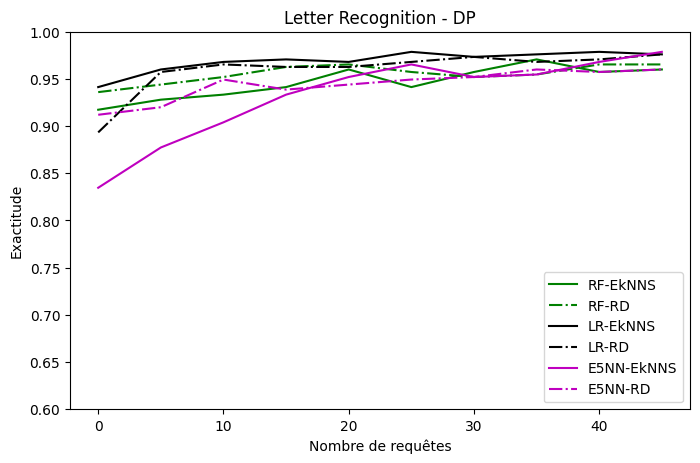

In [65]:
X, y = get_X_y("data/letter_dp.csv", target_position=0)

results = test("real", "real_letterDP_e1nns_rd", X, y, classifiers, N_QUERIES, N_SPI, sampling, test_size=TEST_SIZE/y.shape[0])
visualise("Letter Recognition - DP", N_QUERIES, N_SPI, YLIMIT, **results)

del X, y, results

##### I - J

Counter({0: 755, 1: 747})
  [ real_letterIJ_e1nns_rd_RF done in 36.75 s ] (RF)
       RF-EkNNS : (0.8296763814042614, 0.8753902852624054)
       RF-RD    : (0.8560233774627845, 0.8901099558705491)
  [ real_letterIJ_e1nns_rd_LR done in 25.9 s ] (LR)
       LR-EkNNS : (0.8712633709685362, 0.9106032956981307)
       LR-RD    : (0.8800650791071539, 0.8980682542261796)
  [ real_letterIJ_e1nns_rd_E5NN done in 31.24 s ] (E5NN)
       E5NN-EkNNS : (0.7960690987230334, 0.8588642346103001)
       E5NN-RD    : (0.7921260468953557, 0.8542739531046442)
real_letterIJ_e1nns_rd achieved in 93.9 s


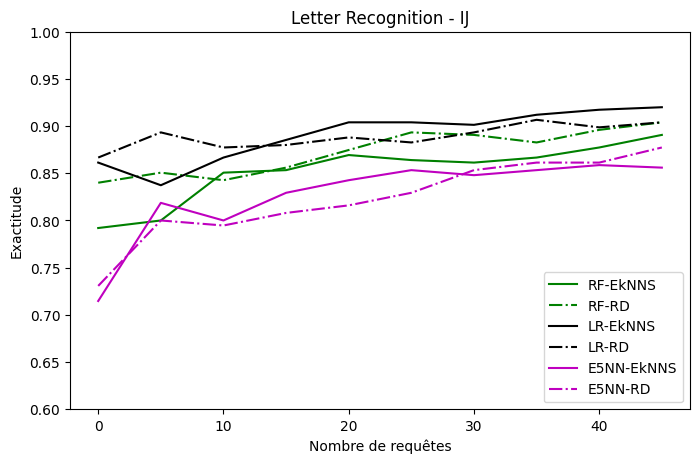

In [66]:
X, y = get_X_y("data/letter_ij.csv", target_position=0)

results = test("real", "real_letterIJ_e1nns_rd", X, y, classifiers, N_QUERIES, N_SPI, sampling, test_size=TEST_SIZE/y.shape[0])
visualise("Letter Recognition - IJ", N_QUERIES, N_SPI, YLIMIT, **results)

del X, y, results

##### V - Y

Counter({1: 786, 0: 764})
  [ real_letterVY_e1nns_rd_RF done in 39.23 s ] (RF)
       RF-EkNNS : (0.8208689637465925, 0.9188643695867411)
       RF-RD    : (0.834465051416968, 0.9052682819163651)
  [ real_letterVY_e1nns_rd_LR done in 26.78 s ] (LR)
       LR-EkNNS : (0.8446732710126227, 0.8939933956540443)
       LR-RD    : (0.8303150099545162, 0.8870183233788174)
  [ real_letterVY_e1nns_rd_E5NN done in 32.42 s ] (E5NN)
       E5NN-EkNNS : (0.7661787097795053, 0.8364879568871614)
       E5NN-RD    : (0.7862069932538461, 0.8740596734128206)
real_letterVY_e1nns_rd achieved in 98.44 s


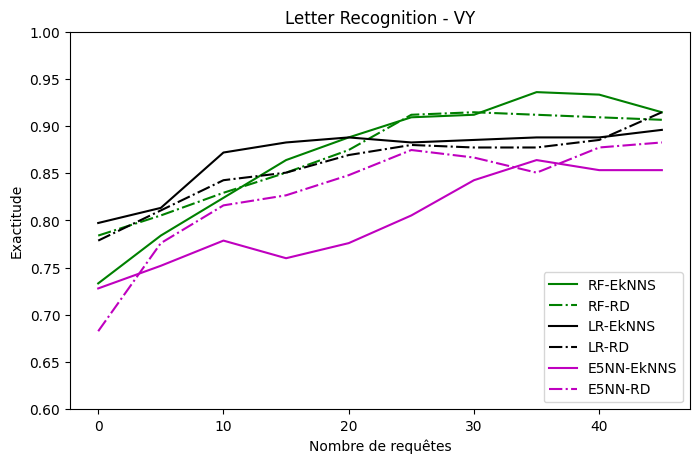

In [67]:
X, y = get_X_y("data/letter_vy.csv", target_position=0)

results = test("real", "real_letterVY_e1nns_rd", X, y, classifiers, N_QUERIES, N_SPI, sampling, test_size=TEST_SIZE/y.shape[0])
visualise("Letter Recognition - VY", N_QUERIES, N_SPI, YLIMIT, **results)

del X, y, results

#### Pen-based Recognition of Handwritten Digits

##### 7 vs 9

Counter({0: 1142, 1: 1055})
  [ real_digits_7vs9_e1nns_rd_RF done in 50.66 s ] (RF)
       RF-EkNNS : (0.9311507952543505, 0.9696492047456491)
       RF-RD    : (0.9571218726740764, 0.9676781273259236)
  [ real_digits_7vs9_e1nns_rd_LR done in 38.46 s ] (LR)
       LR-EkNNS : (0.9645142365316899, 0.9816190968016429)
       LR-RD    : (0.9672838952792535, 0.9836494380540799)
  [ real_digits_7vs9_e1nns_rd_E5NN done in 45.35 s ] (E5NN)
       E5NN-EkNNS : (0.9652732368239969, 0.9872600965093363)
       E5NN-RD    : (0.9773728684844879, 0.9927604648488456)
real_digits_7vs9_e1nns_rd achieved in 134.47 s


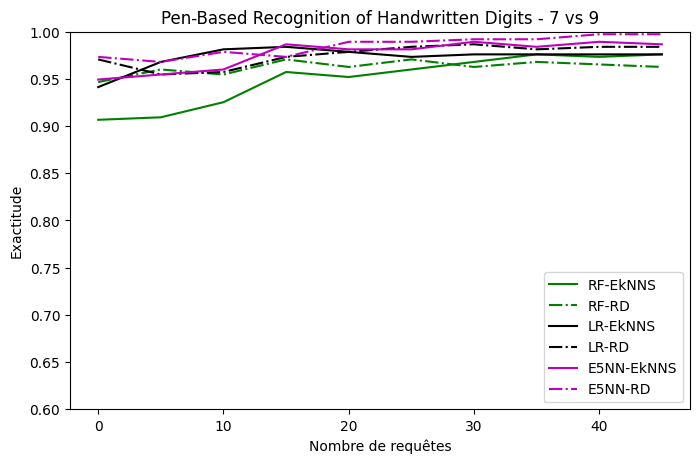

In [68]:
X, y = get_X_y("data/digits_7vs9.csv")

results = test("real", "real_digits_7vs9_e1nns_rd", X, y, classifiers, N_QUERIES, N_SPI, sampling, test_size=TEST_SIZE/y.shape[0])
visualise("Pen-Based Recognition of Handwritten Digits - 7 vs 9", N_QUERIES, N_SPI, YLIMIT, **results)

del X, y, results

##### 1 vs 7

Counter({0: 1143, 1: 1142})
  [ real_digits_1vs7_e1nns_rd_RF done in 51.99 s ] (RF)
       RF-EkNNS : (0.9182175715845133, 0.9729824284154867)
       RF-RD    : (0.9123407999248004, 0.9729925334085326)
  [ real_digits_1vs7_e1nns_rd_LR done in 39.93 s ] (LR)
       LR-EkNNS : (0.9497009952993187, 0.979365671367348)
       LR-RD    : (0.9543524519857243, 0.9720475480142761)
  [ real_digits_1vs7_e1nns_rd_E5NN done in 46.54 s ] (E5NN)
       E5NN-EkNNS : (0.9303387891591032, 0.9448612108408968)
       E5NN-RD    : (0.9281795837039732, 0.9491537496293598)
real_digits_1vs7_e1nns_rd achieved in 138.47 s


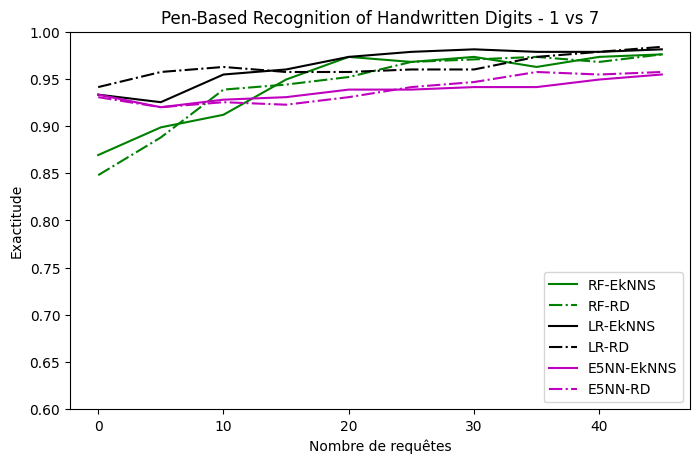

In [69]:
X, y = get_X_y("data/digits_1vs7.csv")

results = test("real", "real_digits_1vs7_e1nns_rd", X, y, classifiers, N_QUERIES, N_SPI, sampling, test_size=TEST_SIZE/y.shape[0])
visualise("Pen-Based Recognition of Handwritten Digits - 1 vs 7", N_QUERIES, N_SPI, YLIMIT, **results)

del X, y, results

##### 3 vs 6 vs 8

Counter({1: 1056, 2: 1055, 0: 1055})
  [ real_digits_3vs6vs8_e1nns_rd_RF done in 70.56 s ] (RF)
       RF-EkNNS : (0.9565721420758584, 0.9842278579241415)
       RF-RD    : (0.9589450220647255, 0.9759883112686079)
  [ real_digits_3vs6vs8_e1nns_rd_LR done in 61.42 s ] (LR)
       LR-EkNNS : (0.9893629680709023, 0.9978370319290978)
       LR-RD    : (0.9811141956189005, 0.9932858043810999)
  [ real_digits_3vs6vs8_e1nns_rd_E5NN done in 66.42 s ] (E5NN)
       E5NN-EkNNS : (0.9694458312781356, 0.9734875020551976)
       E5NN-RD    : (0.960397316615262, 0.9745360167180714)
real_digits_3vs6vs8_e1nns_rd achieved in 198.41 s


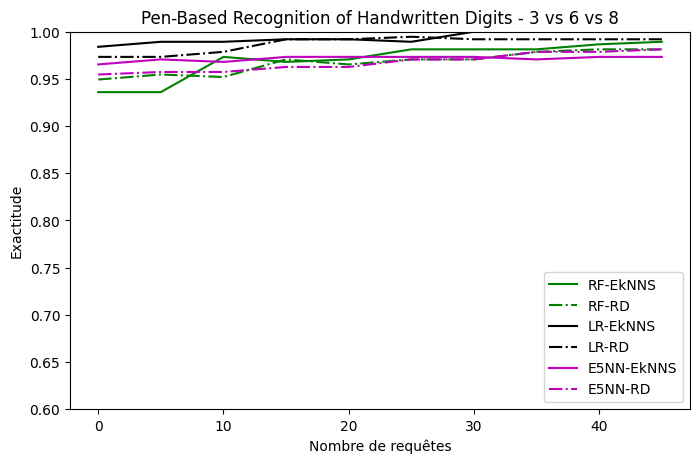

In [70]:
X, y = get_X_y("data/digits_3vs6vs8.csv")

results = test("real", "real_digits_3vs6vs8_e1nns_rd", X, y, classifiers, N_QUERIES, N_SPI, sampling, test_size=TEST_SIZE/y.shape[0])
visualise("Pen-Based Recognition of Handwritten Digits - 3 vs 6 vs 8", N_QUERIES, N_SPI, YLIMIT, **results)

del X, y, results

#### Wine Quality

In [71]:
YLIMIT        = [.0, 6.]

##### Red Wine Quality

Counter({2: 681, 3: 638, 4: 199, 1: 53, 5: 18, 0: 10})
  [ real_red_wine_e1nns_rd_RF done in 67.64 s ] (RF)
       RF-EkNNS : (0.42025374674162724, 0.5178795865917062)
       RF-RD    : (0.43126276722073703, 0.5020705661125963)
  [ real_red_wine_e1nns_rd_LR done in 55.16 s ] (LR)
       LR-EkNNS : (0.4058946818075236, 0.5050386515258096)
       LR-RD    : (0.42831193050051336, 0.5034214028328201)
  [ real_red_wine_e1nns_rd_E5NN done in 60.76 s ] (E5NN)
       E5NN-EkNNS : (0.43409226998524814, 0.4645743966814185)
       E5NN-RD    : (0.4447617909595981, 0.5035048757070686)
real_red_wine_e1nns_rd achieved in 183.57 s


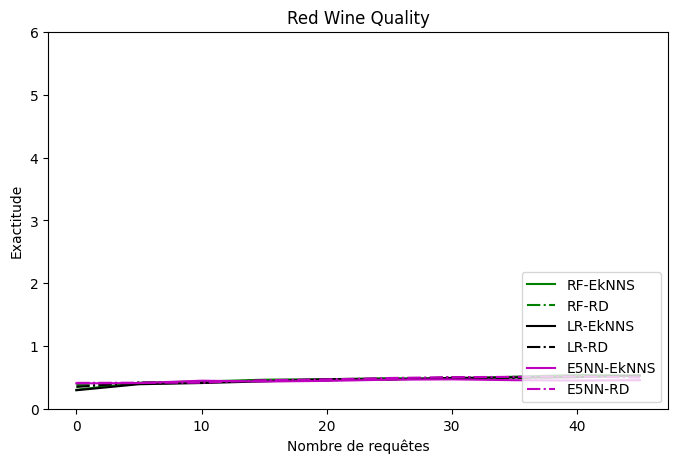

In [72]:
X, y = get_X_y("data/red_wine_quality.csv")

results = test("real", "real_red_wine_e1nns_rd", X, y, classifiers, N_QUERIES, N_SPI, sampling, test_size=TEST_SIZE/y.shape[0])
visualise("Red Wine Quality", N_QUERIES, N_SPI, YLIMIT, **results)

del X, y, results

##### White Wine Quality

Counter({3: 2198, 2: 1457, 4: 880, 5: 175, 1: 163, 0: 20, 6: 5})
  [ real_white_wine_e1nns_rd_RF done in 310.76 s ] (RF)
       RF-EkNNS : (0.3359812777455934, 0.4272187222544067)
       RF-RD    : (0.35551734688191056, 0.44021598645142285)
  [ real_white_wine_e1nns_rd_LR done in 293.72 s ] (LR)
       LR-EkNNS : (0.3041342647966483, 0.4046657352033517)
       LR-RD    : (0.31062653585208044, 0.3720401308145863)
  [ real_white_wine_e1nns_rd_E5NN done in 296.17 s ] (E5NN)
       E5NN-EkNNS : (0.3534026536617555, 0.3937973463382445)
       E5NN-RD    : (0.29216377531305926, 0.3787695580202741)
real_white_wine_e1nns_rd achieved in 900.66 s


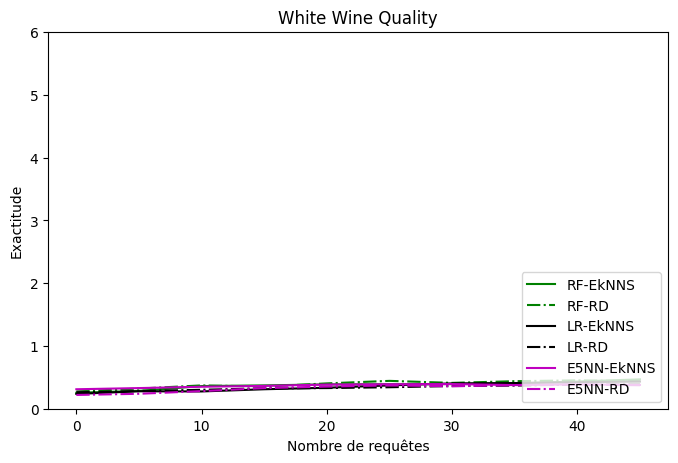

In [73]:
X, y = get_X_y("data/white_wine_quality.csv")

results = test("real", "real_white_wine_e1nns_rd", X, y, classifiers, N_QUERIES, N_SPI, sampling, test_size=TEST_SIZE/X.shape[0])
visualise("White Wine Quality", N_QUERIES, N_SPI, YLIMIT, **results)

del X, y, results